In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kasikrit/idc-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.55G/1.55G [01:17<00:00, 21.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1


In [2]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/idc-dataset'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1', common_dir)

print(f"Dataset moved to: {common_dir}")

Dataset moved to: /content/datasets/idc-dataset


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import ResNet50
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger
import time
import os.path
import itertools
import cv2
from glob import glob
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
import math

import keras
from tensorflow.keras.regularizers import l2

Training data directory exists: /content/datasets/idc-dataset/1/IDC/training
Contents of the training directory:
['1', '0']
Validation data directory exists: /content/datasets/idc-dataset/1/IDC/validation
Contents of the validation directory:
['1', '0']
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Number of layers in the base model:  19


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,0

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Number of layers in the base model:  21


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.
Loading network from ImageNet weights.
<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> True
<Conv2D name=block4_conv1, built=True> True
<Conv2D name=block4_conv2, built=True> True
<Conv2D name=block4_conv3, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<MaxPooling2D name=block5_pool, built=True> True


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7043 - loss: 0.6426
Epoch 1: val_loss improved from inf to 0.62538, saving model to /content/drive/MyDrive/IDC_VGG16/checkpoints/idcVGG16.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.7043 - loss: 0.6426 - val_accuracy: 0.7157 - val_loss: 0.6254 - learning_rate: 0.0010
Epoch 2/5
   5/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.8004 - loss: 0.4888

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7751 - loss: 0.5048
Epoch 2: val_loss improved from 0.62538 to 0.42044, saving model to /content/drive/MyDrive/IDC_VGG16/checkpoints/idcVGG16.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.7751 - loss: 0.5048 - val_accuracy: 1.0000 - val_loss: 0.4204 - learning_rate: 0.0010
Epoch 3/5
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7070 - loss: 0.6062
Epoch 3: val_loss did not improve from 0.42044
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.7070 - loss: 0.6062 - val_accuracy: 0.7157 - val_loss: 0.5973 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7166 - loss: 0.5964
Epoch 4: val_loss improved from 0.42044 to 0.32758, saving model to /content/drive/MyDrive/IDC_VGG16/checkpoints/idcVGG16.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7166 - loss: 0.5964 - val_accuracy: 1.0000 - val_loss: 0.3276 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7235 - loss: 0.5898
Epoch 5: val_loss did not improve from 0.32758
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.7235 - loss: 0.5898 

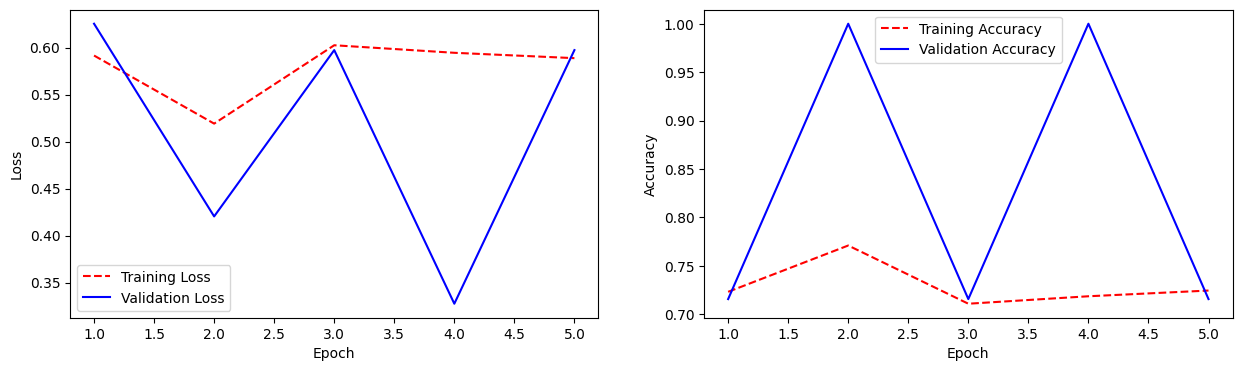

In [5]:
# Define dataset paths
train_data_dir = '/content/datasets/idc-dataset/1/IDC/training'
valid_data_dir = '/content/datasets/idc-dataset/1/IDC/validation'

# Define output paths in Google Drive
output_dir = '/content/drive/MyDrive/IDC_VGG16'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

checkpoints_dir = os.path.join(output_dir, 'checkpoints')
logs_dir = os.path.join(output_dir, 'logs')

if not os.path.exists(checkpoints_dir):
    os.makedirs(checkpoints_dir)
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

# Check if the directories exist
if os.path.exists(train_data_dir):
    print(f"Training data directory exists: {train_data_dir}")
    print("Contents of the training directory:")
    print(os.listdir(train_data_dir))
else:
    print(f"Training data directory NOT found: {train_data_dir}")

if os.path.exists(valid_data_dir):
    print(f"Validation data directory exists: {valid_data_dir}")
    print("Contents of the validation directory:")
    print(os.listdir(valid_data_dir))
else:
    print(f"Validation data directory NOT found: {valid_data_dir}")

batch_size=8

checkpointer = ModelCheckpoint(
    filepath=os.path.join(checkpoints_dir, 'idcVGG16.keras'),
    verbose=1,
    save_best_only=True
)


early_stopper = EarlyStopping(monitor='val_loss', patience=10)


tensorboard = TensorBoard(log_dir=logs_dir)

timestamp = time.time()
csv_logger = CSVLogger(os.path.join(logs_dir, f'idcVGG16-training-{timestamp}.log'))

def get_generators():
    train_datagen = ImageDataGenerator(
        featurewise_std_normalization=True,
        rescale=1./255,
                zoom_range=0.2,
                #brightness_range=(0.9, 1.1),
                rotation_range=0.2,
                #shear_range=0.2,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode='nearest'
                )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')

    return train_generator, validation_generator

def get_model(weights='imagenet'):

    base_model = VGG16(weights=weights, include_top=False)
    for layer in base_model.layers:
        layer.trainable = False
    print("Number of layers in the base model: ", len(base_model.layers))


    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    predictions = Dense(2, activation='softmax')(x)


    model = Model(inputs=base_model.input, outputs=predictions)
    return model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
def freeze_all_but_top(model):

    for layer in model.layers[10:]:
        layer.trainable = True

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    for layer in model.layers:
        print(layer, layer.trainable)


    return model

def train_model(model, nb_epoch, generators, callbacks=[]):
    train_generator, validation_generator = generators
    from sklearn.utils import class_weight
    import numpy as np

    hist=model.fit (
        train_generator,
        steps_per_epoch= 10000 // batch_size,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.filenames) // batch_size,
        epochs=nb_epoch,
        #class_weight=class_weights,
        callbacks=callbacks)
    fig, axs = plt.subplots(1, 2, figsize = (15, 4))
    training_loss = hist.history['loss']
    validation_loss = hist.history['val_loss']
    training_accuracy = hist.history['accuracy']
    validation_accuracy = hist.history['val_accuracy']
    epoch_count = range(1, len(training_loss) + 1)
    #N=num_epochs
    axs[0].plot(epoch_count, training_loss, 'r--')
    axs[0].plot(epoch_count, validation_loss, 'b-')
    axs[0].legend(['Training Loss', 'Validation Loss'])
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[1].plot(epoch_count, training_accuracy, 'r--')
    axs[1].plot(epoch_count, validation_accuracy, 'b-')
    axs[1].legend(['Training Accuracy', 'Validation Accuracy'])
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    return model

def main(weights_file):
    model = get_model()
    print(model.summary())
    print("Number of layers in the base model: ", len(model.layers))
    generators = get_generators()

    if weights_file is None:
        print("Loading network from ImageNet weights.")

        model = freeze_all_but_top(model)
        model = train_model(model, 5, generators,
                        [checkpointer, early_stopper, tensorboard, csv_logger, learning_rate_reduction])
    else:
        print(f"Loading saved model: {weights_file}")
        model.load_weights(weights_file)

if __name__ == '__main__':
    weights_file = None
    #print(len(data.classes))
    main(weights_file)